# Домашнее задание к лекции «Корреляция и корреляционный анализ»

1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график   
Рассчитать коэффициенты корреляции Пирсона и Спирмена  
Построить модель линейной регрессии  
Рассчитать коэффициент детерминации  
Вывести график остатков

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
water_df = pd.read_csv('water.csv')
water_df.info()
water_df.drop(water_df.columns[[0, 2]], axis='columns').head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


,location,mortality,hardness
0,South,1247,105
1,North,1668,17
2,South,1466,5
3,North,1800,14
4,North,1609,18


In [52]:
water_df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


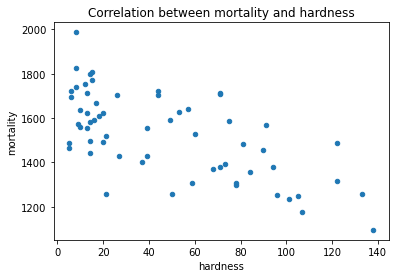

In [59]:
# посмотрим на взимосвязь через точечный график
water_df.plot(kind = 'scatter', 
        x = 'hardness', 
        y = 'mortality', 
        title = 'Correlation between mortality and hardness')
plt.show()

In [60]:
#делаю расчет коэффициента корелляции Пирсона
water_df[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [61]:
#делаю расчет коэффициента корелляции Спирмана
water_df[['hardness' , 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [47]:
# модель линейной регрессии

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [62]:
X = water_df[['hardness']]
y = water_df['mortality']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [64]:
X_train.shape

(42, 1)

In [65]:
y_train.shape

(42,)

In [66]:
#Создаем класс линейной регрессии
# .fit -подбор коэф.линейной регрессии(обучение модели)
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [73]:
# если я правильно понял,то с учетом минусового коэф :
# с увеличение жесткости смертность снижается ,что и соотв.графику
model.coef_

array([-3.13167087])

In [68]:
model.intercept_

1668.9722977277095

In [77]:
# прогнозирую данные по смертности
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [80]:
# делаю расчет коэффициента детерминации модели

model.score(X_test, y_test)

0.5046490611017092

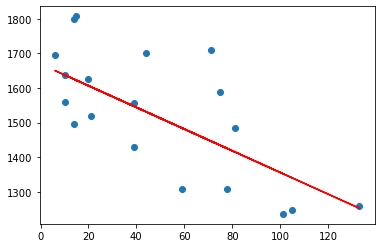

In [76]:
# визуализирую результаты
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [64]:
# Получение графика остатков на основе альтернативного метода из лекции

In [81]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [87]:
X_const = sm.add_constant(X_train)

In [101]:
model = sm.OLS(y_train, X_const)
results = model.fit()

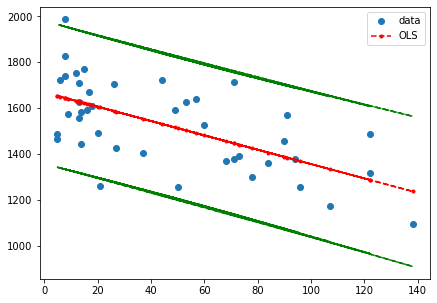

In [104]:
#Остатки
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

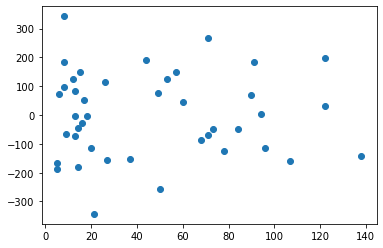

In [105]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

###  Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью
#### На основании полученного расчетного коэффициента детерминации 50,46% можно предположить,что  расчетная модель приемлима и есть средняя зависимость смертности от жесткости воды

# Задание 2.  
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы  
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
water_df = pd.read_csv('water.csv')
water_df_South = water_df[water_df.location == 'South']
water_df_South.info()
water_df_South.drop(water_df.columns[[0, 2]], axis='columns').head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


,location,mortality,hardness
0,South,1247,105
2,South,1466,5
7,South,1299,78
9,South,1359,84
10,South,1392,73


In [55]:
water_df_South.describe()

,Unnamed: 0,mortality,hardness
count,26.000000,26.000000,26.000000
mean,31.346154,1376.807692,69.769231
std,18.742342,140.269175,40.360682
min,1.000000,1096.000000,5.000000
25%,14.250000,1259.250000,40.250000
50%,33.500000,1364.000000,75.500000
75%,46.500000,1485.750000,99.750000
max,60.000000,1627.000000,138.000000


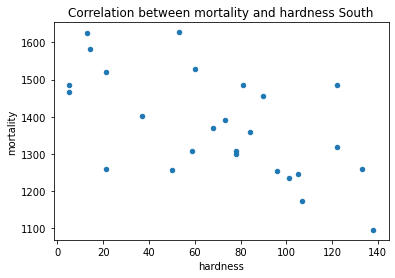

In [60]:
# посмотрим на взимосвязь через точечный график region South
water_df_South.plot(kind = 'scatter', 
        x = 'hardness', 
        y = 'mortality', 
        title = 'Correlation between mortality and hardness South')
plt.show()

In [62]:
#делаю расчет коэффициента корелляции Пирсона for South
water_df_South[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [65]:
#делаю расчет коэффициента корелляции Спирмана for South
water_df_South[['hardness' , 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [58]:
water_df_North = water_df[water_df.location == 'North']
water_df_North.info()
water_df_North.drop(water_df.columns[[0, 2]], axis='columns').head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


,location,mortality,hardness
1,North,1668,17
3,North,1800,14
4,North,1609,18
5,North,1558,10
6,North,1807,15


In [59]:
water_df_North.describe()

,Unnamed: 0,mortality,hardness
count,35.000000,35.000000,35.000000
mean,30.742857,1633.600000,30.400000
std,17.254740,136.936911,26.134494
min,2.000000,1378.000000,6.000000
25%,17.500000,1557.500000,12.500000
50%,30.000000,1637.000000,17.000000
75%,45.500000,1718.000000,44.000000
max,61.000000,1987.000000,94.000000


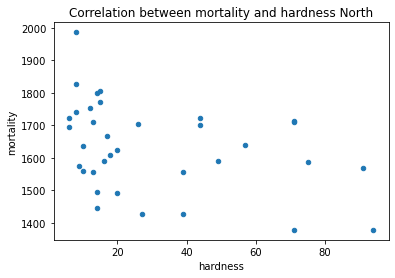

In [61]:
# посмотрим на взимосвязь через точечный график region North
water_df_North.plot(kind = 'scatter', 
        x = 'hardness', 
        y = 'mortality', 
        title = 'Correlation between mortality and hardness North')
plt.show()

In [63]:
#делаю расчет коэффициента корелляции Пирсона for North
water_df_North[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [66]:
#делаю расчет коэффициента корелляции Спирмана for North
water_df_North[['hardness' , 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [68]:
XS = water_df_South[['hardness']]
yS = water_df_South['mortality']

XN = water_df_North[['hardness']]
yN = water_df_North['mortality']

In [69]:
XS_train, XS_test, yS_train, yS_test = train_test_split(XS, yS, test_size=0.30, random_state=42)

XN_train, XN_test, yN_train, yN_test = train_test_split(XN, yN, test_size=0.30, random_state=42)

In [73]:
modelS = LinearRegression()
modelS.fit(XS_train, yS_train) 

LinearRegression()

In [74]:
modelS.score(XS_test, yS_test)

-2.5519223012352077

In [75]:
modelN.score(XN_test, yN_test)

0.018885304285745863

yS_pred = modelS.predict(XS_test)
yS_pred

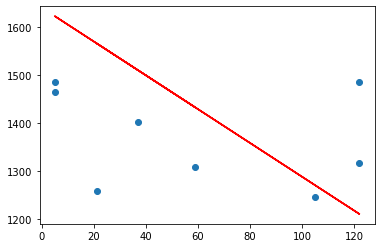

In [78]:
plt.scatter(XS_test, yS_test)
plt.plot(XS_test, yS_pred, c='r')

In [79]:
modelN = LinearRegression()
modelN.fit(XN_train, yN_train) 

LinearRegression()

In [80]:
yN_pred = modelN.predict(XN_test)
yN_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

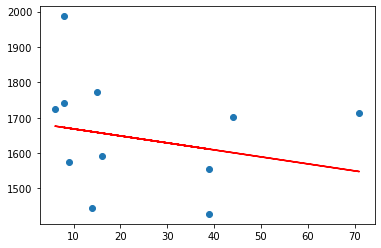

In [81]:
plt.scatter(XN_test, yN_test)
plt.plot(XN_test, yN_pred, c='r')

## Аналогичная зависимость в некоторой степени сохраняется только  для Севера 
## Фактически,проанализировав раздельно два региона, предполагаю ,что явной  зависимости смертности от жесткости воды нет.